In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import pandas as pd
import matplotlib
#matplotlib.use('Agg')
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from msmbuilder.io import (gather_metadata, save_meta, NumberedRunsParser, load_meta, render_meta, preload_tops, 
                           save_trajs, save_generic,load_trajs, backup, load_generic, preload_top)
import mdtraj as md
from msmbuilder.dataset import dataset
import itertools


## Note

The tricky thing is making the "distance pairs". Nedd to find a way to compare by residue and not by atom. 
At least in the way I write the code. 

Also, we may want to change the function we are using to:

https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_contacts.html

Also notice!! this will find all the possible atom pairs and give you their minimum distance. It does not have any threshold! or filter!! so you we are actually calculating distances even for atoms that are very far away! 


## Define functions

In [3]:
def plot_mindist_pairs(mutsys, atomN1, atomN2):#xyz, dist_pairs, out_res, mutant,outdir):
    left, width = 0.1, 0.65
    bottom, height = 0.1, 0.65
    bottom_h = left_h = left + width + 0.03
    rect_scatter = [left, bottom, width, height]
    rect_histy = [left_h, bottom, 0.2, height]
    plt.figure(1, figsize=(16, 8))
    axRMSD = plt.axes(rect_scatter)
    axRMSD.set_ylim([0, 0.75])
    axHisty = plt.axes(rect_histy)
    axHisty.set_ylim([0, 0.75])
    timestep=0.1
    axRMSD.set_xlabel('Frame #')
    axRMSD.set_ylabel('Distance (nm)')
    axRMSD.set_title("%s_%s_%s" % (mutsys, atomN1, atomN2 ))
    axHisty.set_xlabel('P')
    axRMSD.plot(mindist, alpha=0.5)
    axRMSD.axhline(y=0.25, color='r', linestyle='-.')
    #axRMSD.axhline(y=0.4, color='r', linestyle='-.')
    axHisty.hist(mindist, bins=50, orientation='horizontal', alpha=0.5)
    plt.axhline(y=0.25, color='r', linestyle='-')
    #plt.axhline(y=0.4, color='r', linestyle='-')
    #rmsds_array.append(rmsd)
    plt.savefig(outdir+mutsys+'_'+atomN1+'_'+atomN2+'.png')
    plt.show()

## Load Data

In [4]:
# Define system and paths

mutsys="CONTROL"

topology_file="/Users/fatima/Stanford/70S/Trajectories/CONTROL/PTCna/em_PTCna.pdb"
md_root="/Users/fatima/Stanford/70S/Trajectories/%s/PTCna/cattrajs/run_all.xtc" % mutsys
#md_trajs=[md_root+"run0.xtc",md_root+"run1.xtc", md_root+"run2.xtc",md_root+"run3.xtc", md_root+"run4.xtc" ]

data_subsampling_stride=1
timestep=0.1 #ns

outdir="/Users/fatima/Stanford/70S/CombinedAnalysis/1SEP2022_HBONDS_50pc/" 
out_csv=outdir+"%s.csv" % mutsys

In [5]:
if not os.path.isdir(outdir):
    print("Generating out dir", outdir)
    os.mkdir(outdir)

In [6]:
# Load topology and trajectories 

xyz = md.load(md_root, top=topology_file)
topology=md.load(topology_file).topology

In [7]:
#Calculate hbonds




#hbonds=md.baker_hubbard(xyz, freq=0.75) #freq=0.1, exclude_water=True, periodic=True, 
                        #sidechain_only=False, distance_cutoff=0.25, angle_cutoff=120)

hbonds2=md.baker_hubbard(xyz, freq=0.50)    



In [8]:
label = lambda hbond : '%s -- %s' % (topology.atom(hbond[0]), topology.atom(hbond[2]))

In [9]:
#for hbond in hbonds:
#    print(label(hbond))

In [10]:
for hbond in hbonds2:
    print(label(hbond))

G2061-N2 -- A2062-O2'
C2064-N4 -- G2446-O6
C2065-N4 -- G2445-O6
C2066-N4 -- G2444-O6
G2251-N1 -- C103-N3
G2251-N2 -- C103-O2
G2252-N1 -- C102-N3
G2252-N2 -- C102-O2
G2444-N1 -- C2066-N3
G2444-N2 -- C2066-O2
G2445-N1 -- C2065-N3
G2445-N2 -- C2065-O2
G2446-N1 -- C2064-N3
G2446-N2 -- C2064-O2
G2447-N2 -- A2450-OP2
G2505-N1 -- G2581-O6
G2505-N2 -- U2506-O4
U2506-N3 -- G2583-O6
C2507-N4 -- G2582-O6
G2508-N1 -- U2580-O2
G2509-N1 -- C2579-N3
G2509-N2 -- C2579-O2
G2553-N2 -- G2508-O4'
G2576-N1 -- U2506-OP2
C2579-N4 -- G2576-O4'
C2579-N4 -- G2509-O6
U2580-N3 -- G2508-O6
G2581-N2 -- G2581-OP2
G2582-N1 -- C2507-N3
G2582-N2 -- C2507-O2
G2582-N2 -- G2553-N3
G2583-N1 -- U2506-O2
A2587-N6 -- G2608-N3
G2588-N1 -- C2606-N3
G2588-N2 -- C2606-O2
A2589-N6 -- U2605-O4
A2590-N6 -- U2604-O4
U2604-N3 -- A2590-N1
U2605-N3 -- A2589-N1
C2606-N4 -- G2588-O6
G2608-N2 -- A2587-OP2
G2608-N2 -- A2587-N7
ASN149-N -- C2575-OP1
C102-N4 -- G2252-O6
C103-N4 -- G2251-O6


[(378, 418)]


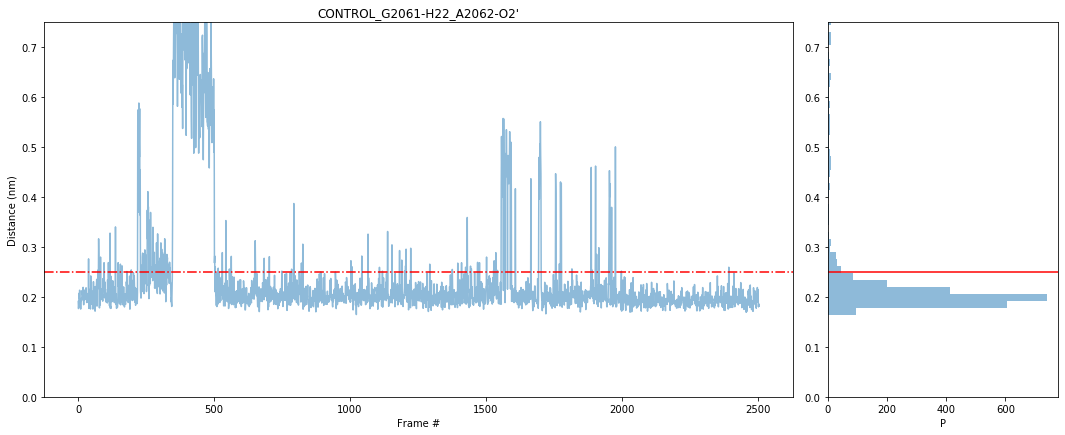

[(472, 919)]


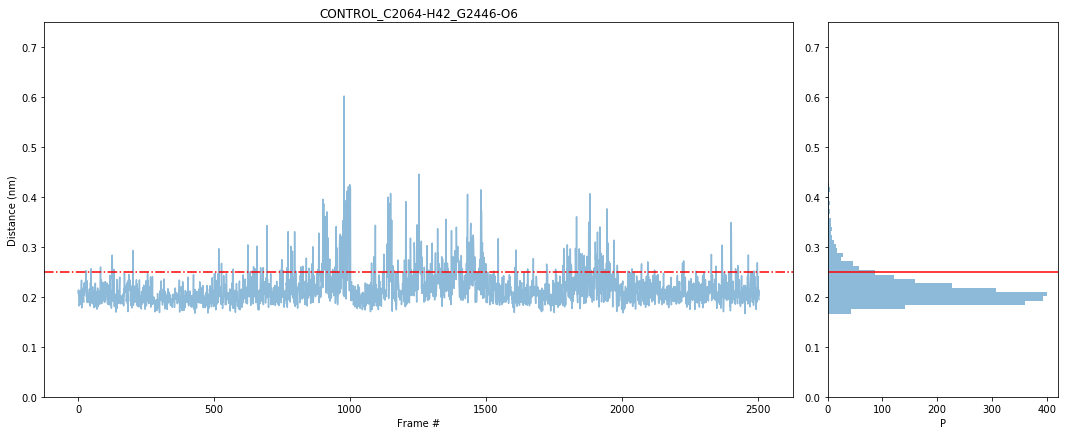

[(503, 885)]


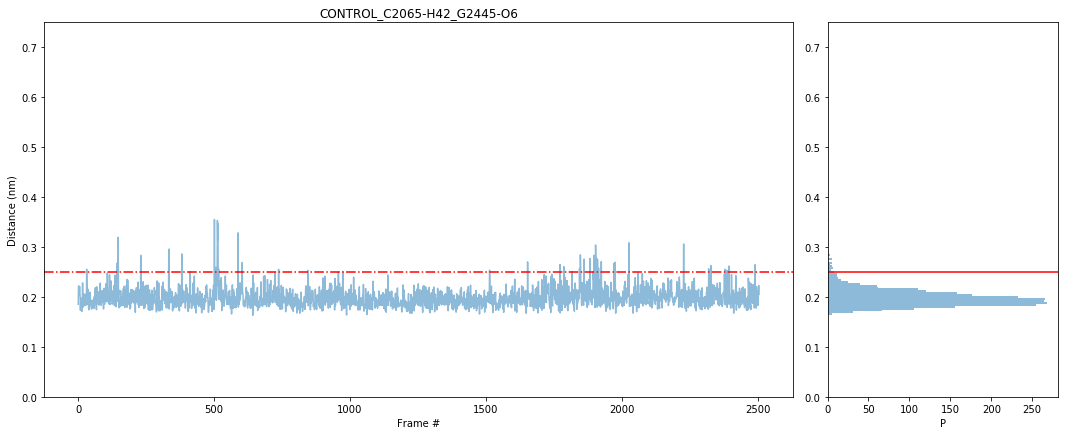

[(534, 851)]


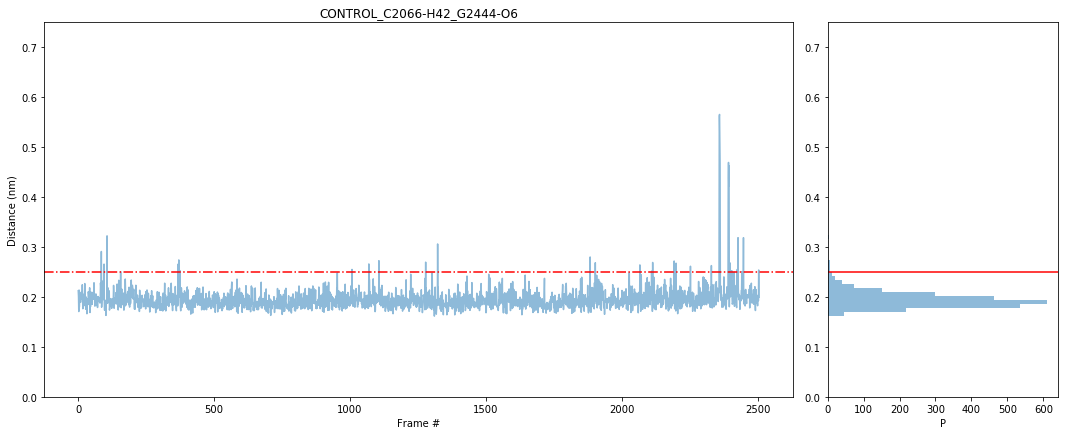

[(565, 2430)]


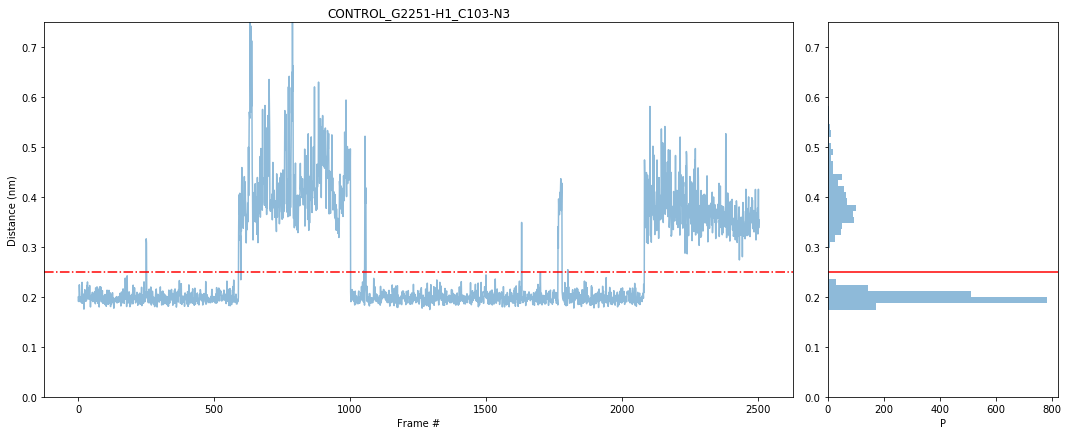

[(568, 2432)]


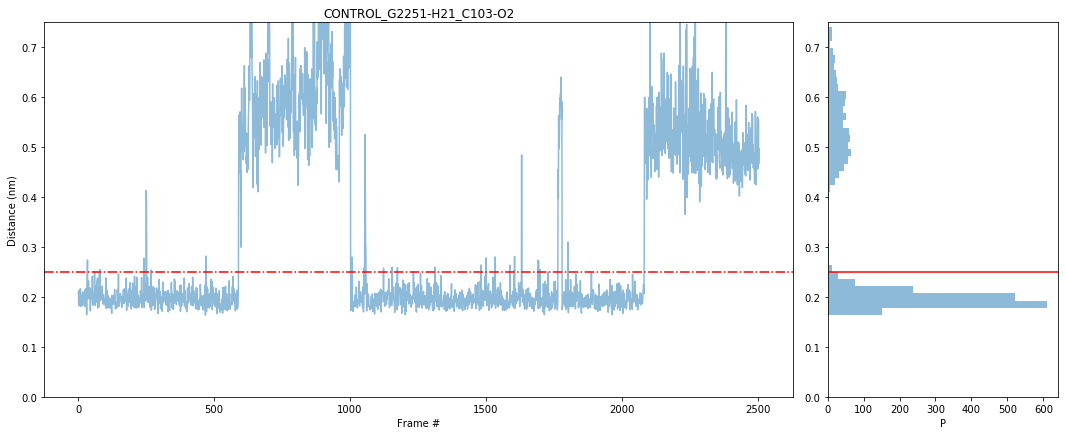

[(599, 2399)]


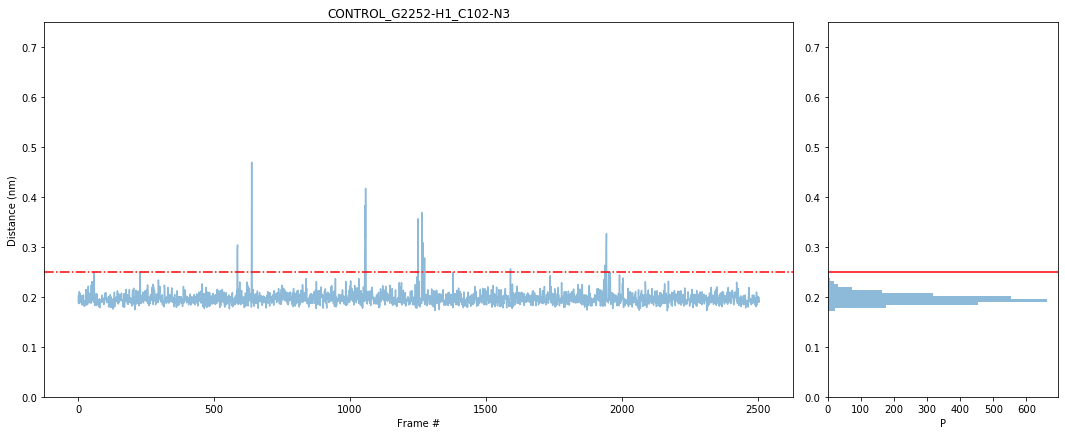

[(602, 2401)]


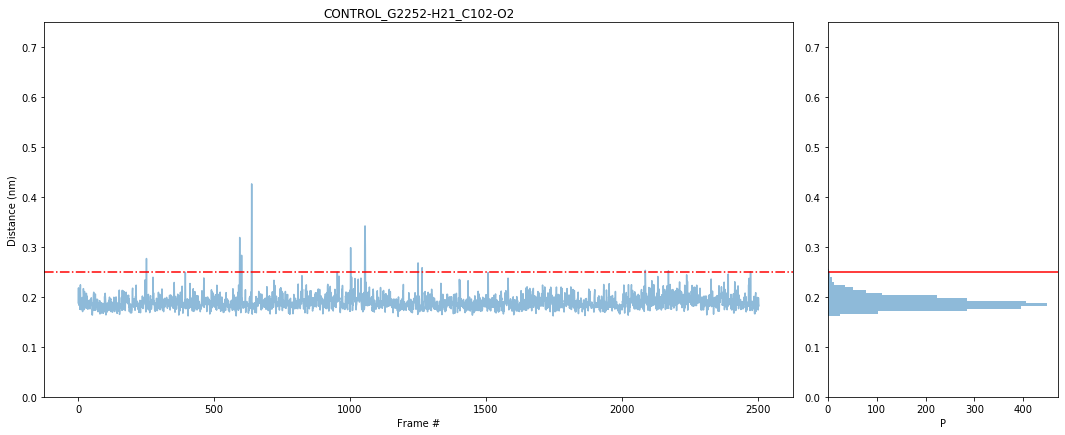

[(853, 535)]


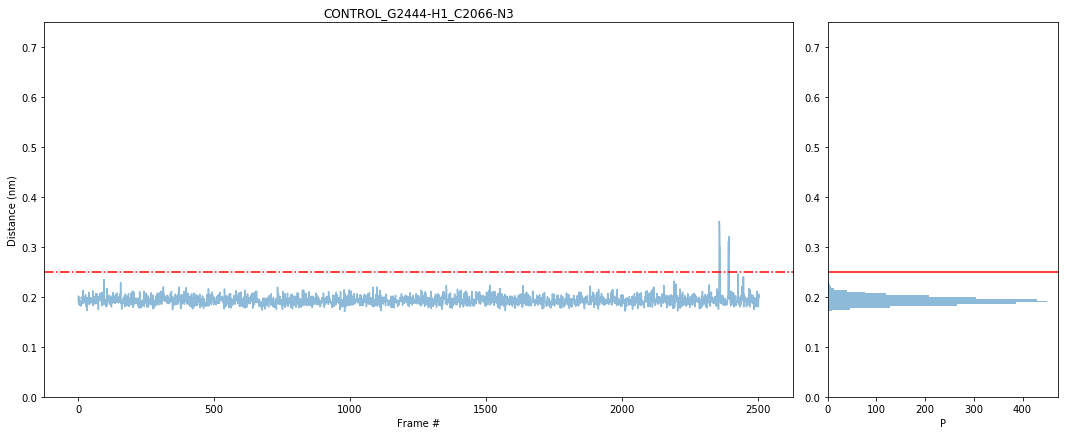

[(856, 537)]


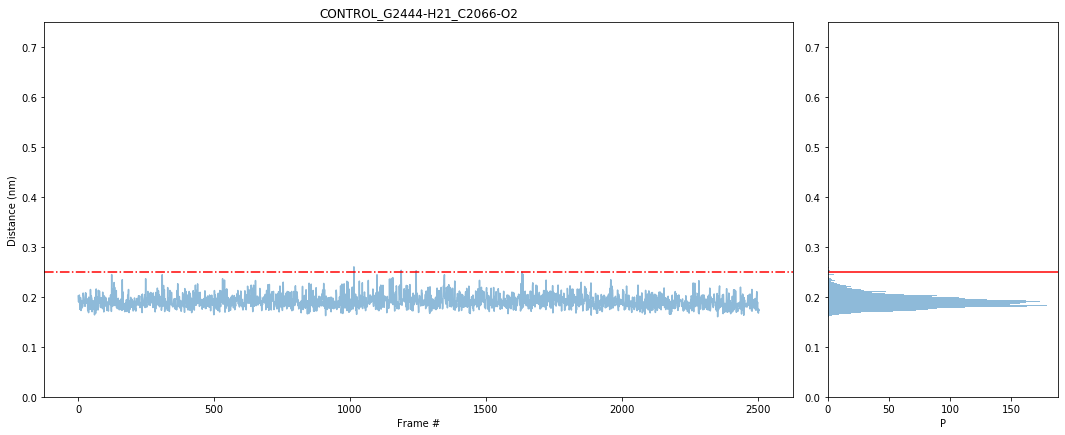

[(887, 504)]


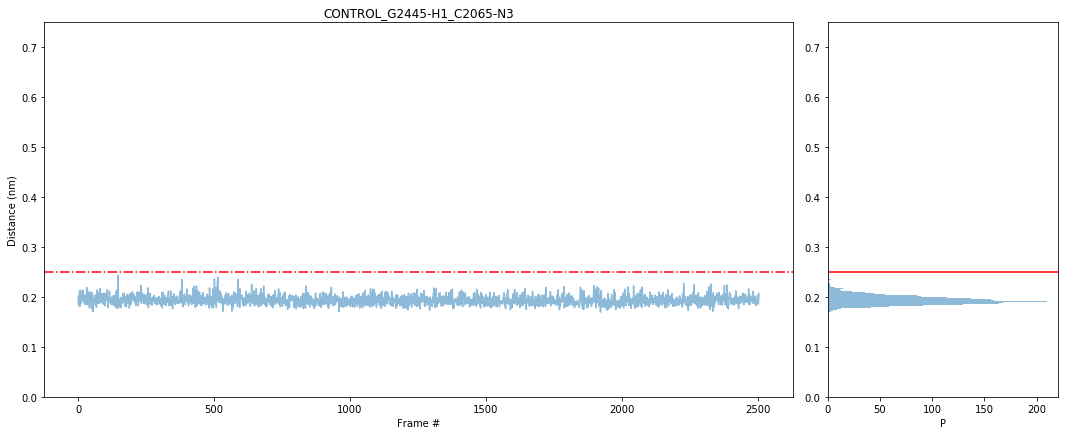

[(890, 506)]


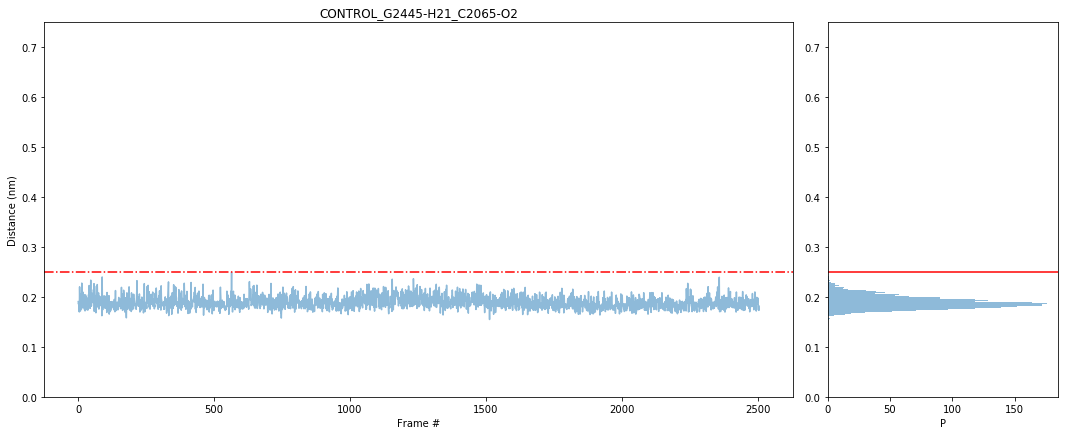

[(921, 473)]


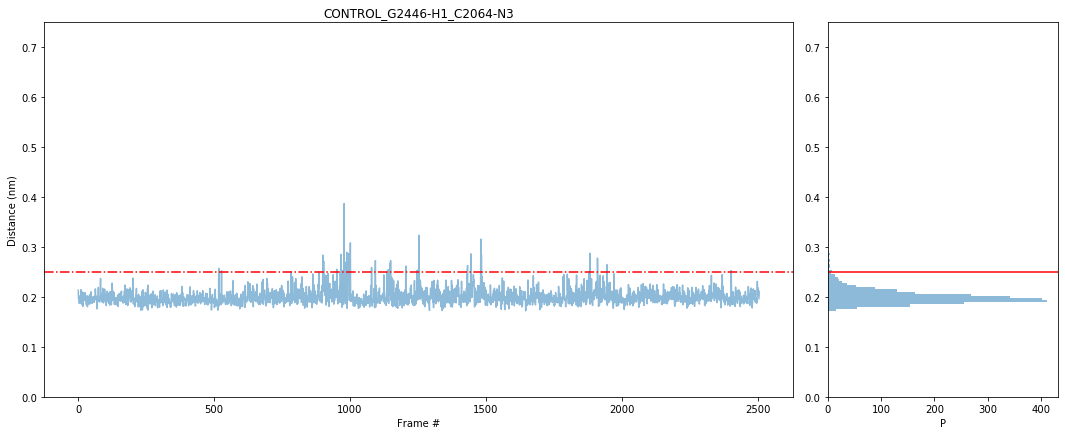

[(924, 475)]


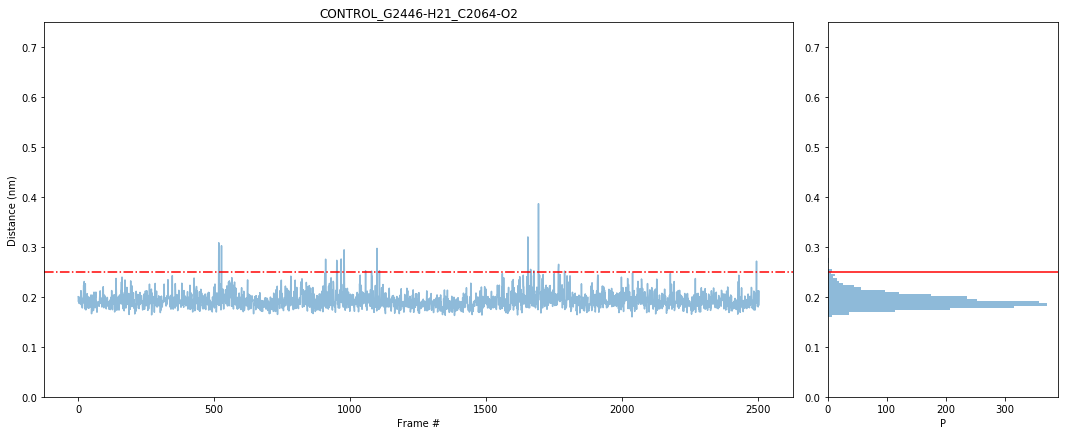

[(959, 971)]


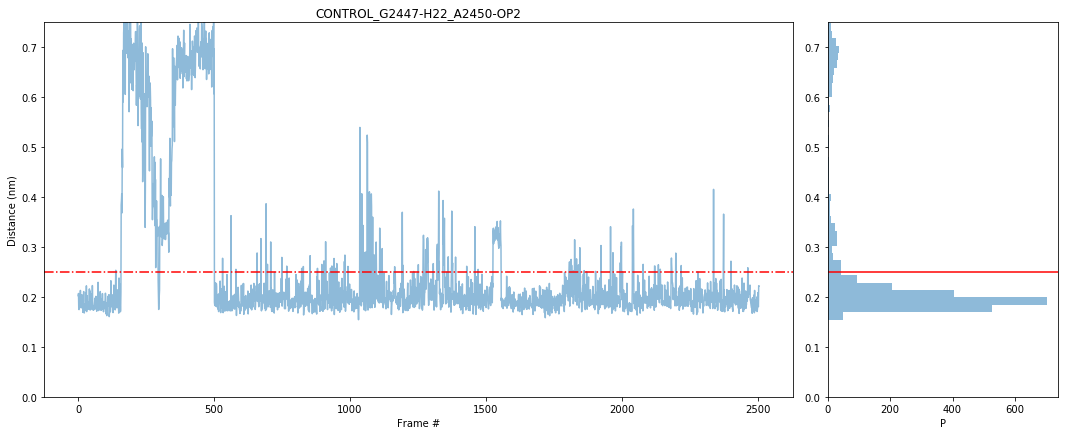

[(1277, 1695)]


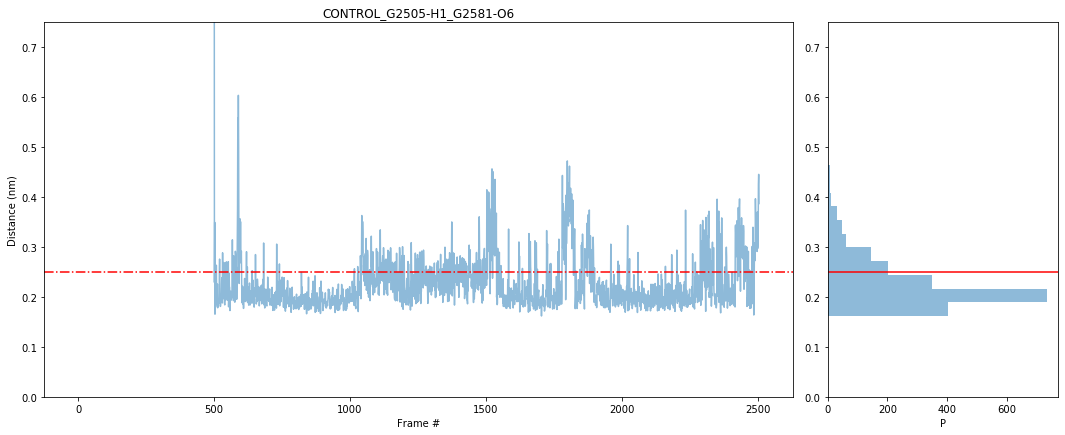

[(1281, 1309)]


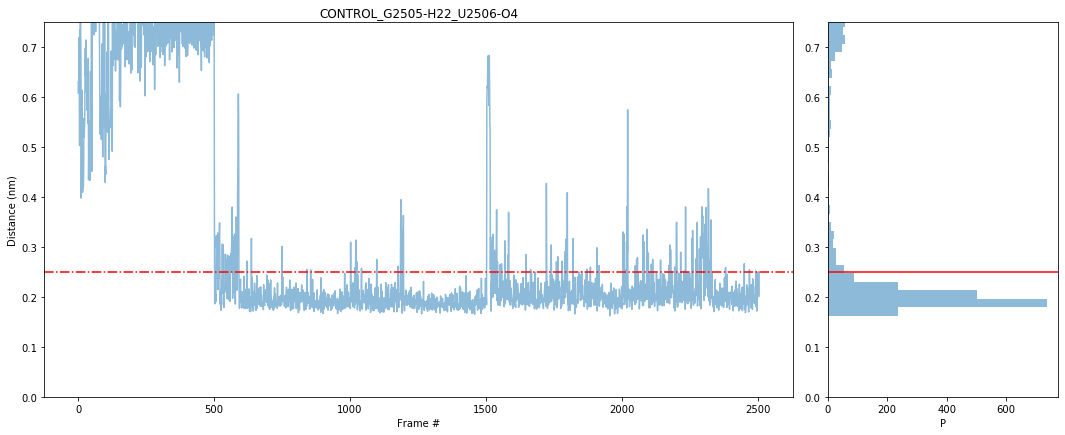

[(1311, 1763)]


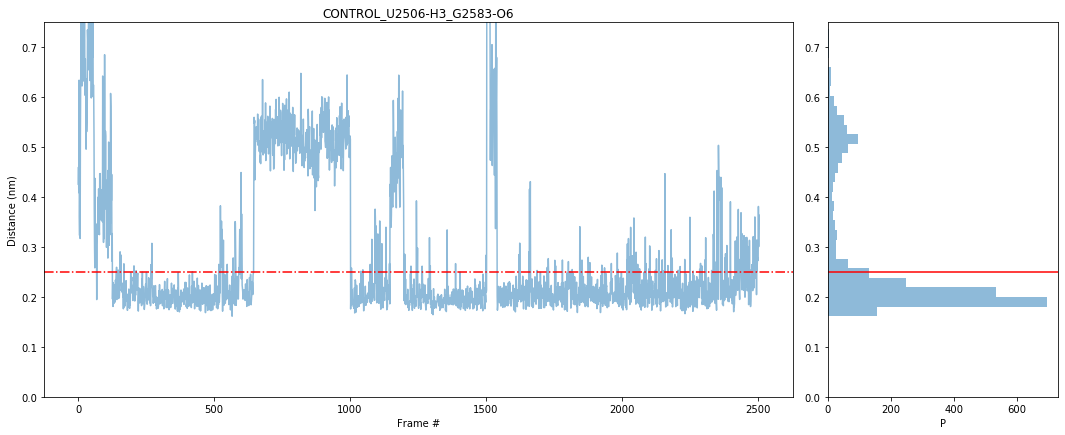

[(1341, 1729)]


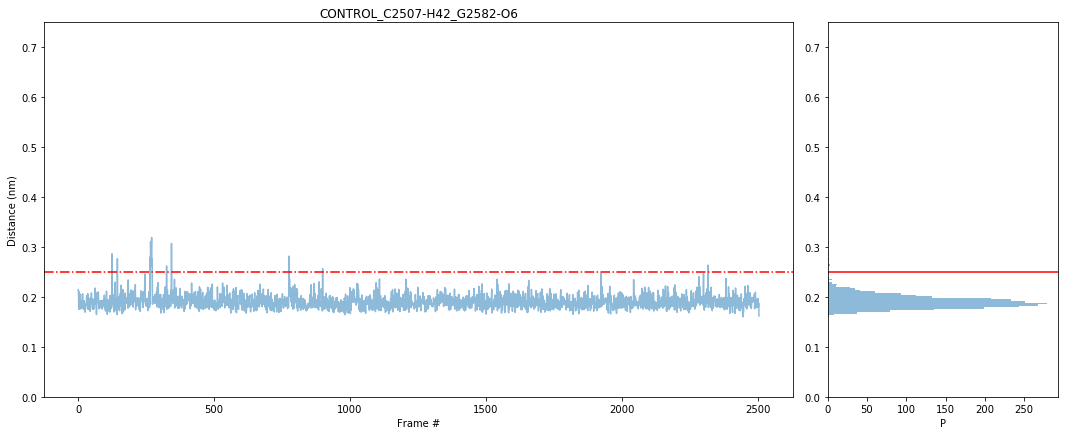

[(1372, 1669)]


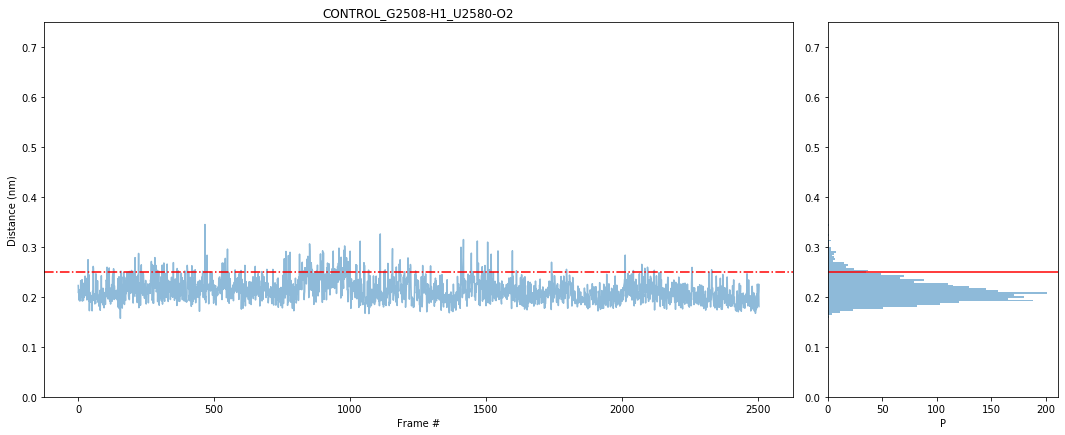

[(1406, 1637)]


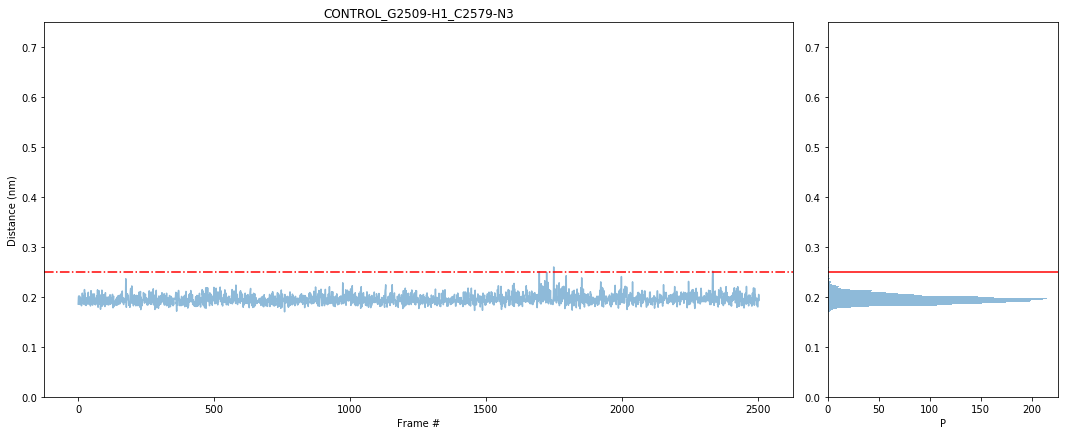

[(1409, 1639)]


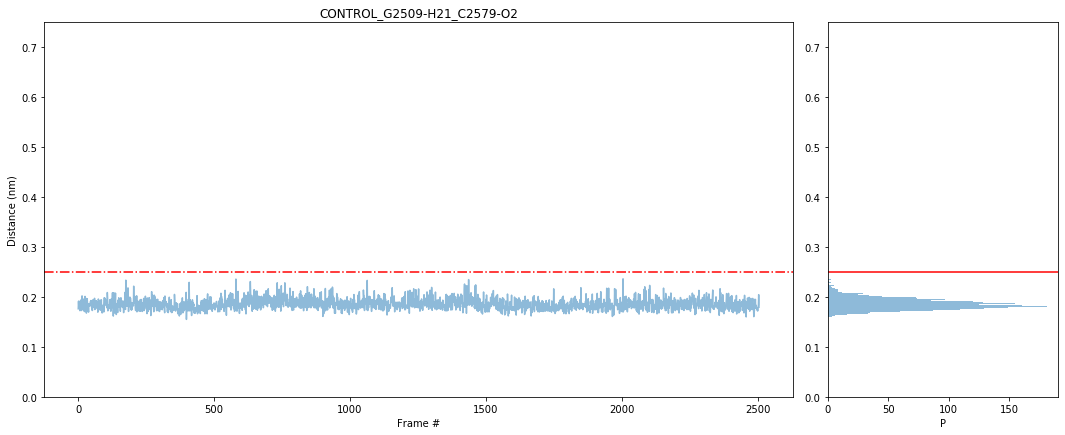

[(1444, 1361)]


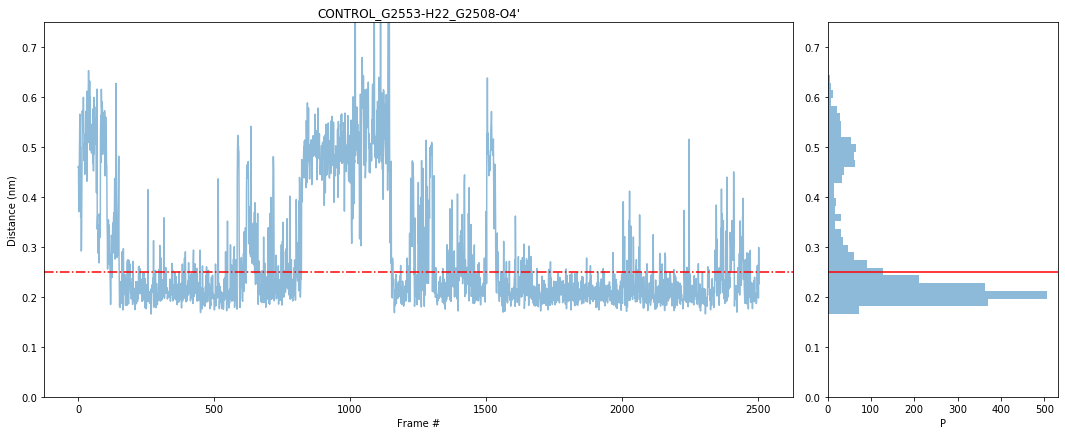

[(1569, 1293)]


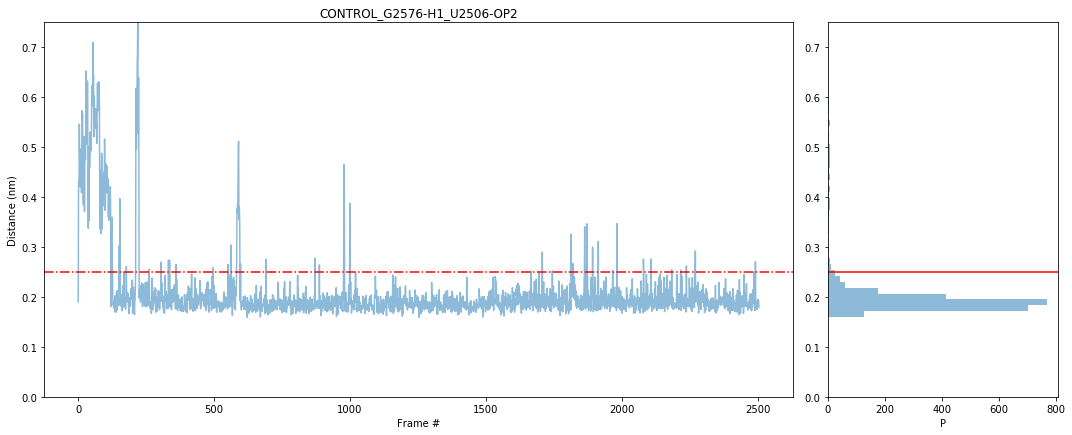

[(1635, 1558)]


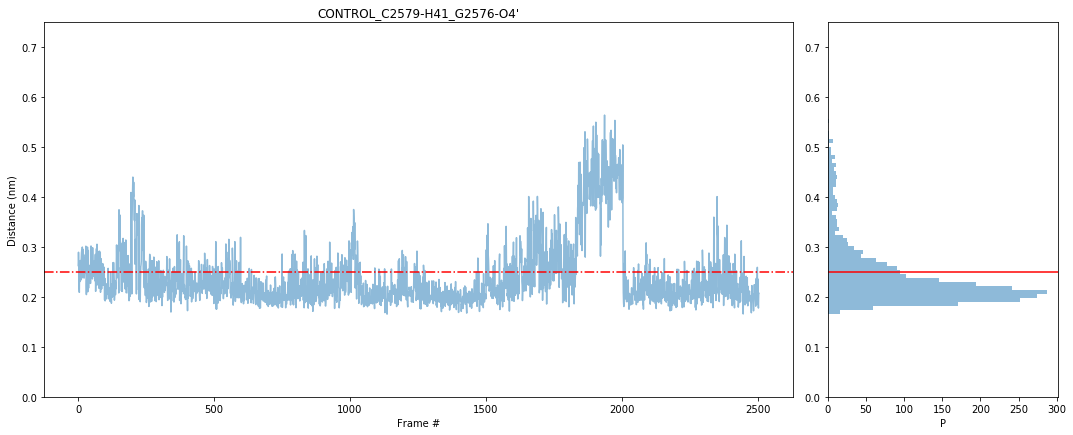

[(1636, 1404)]


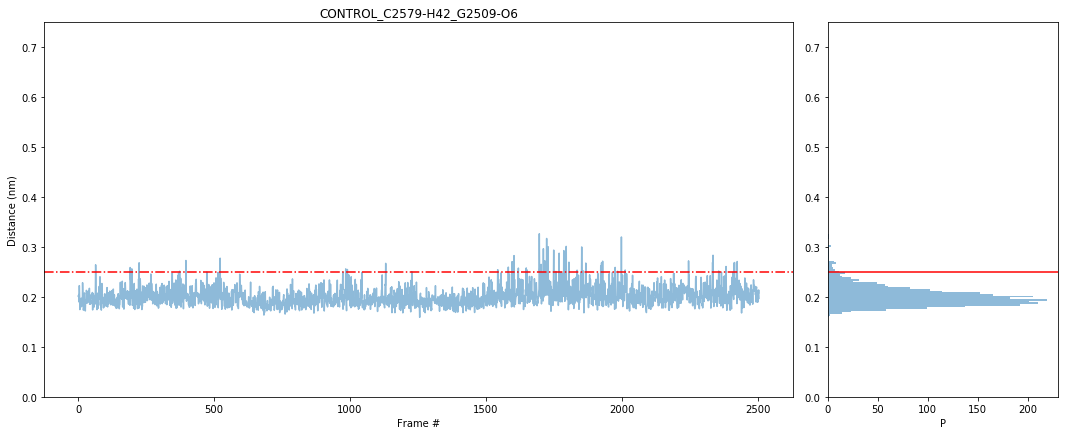

[(1667, 1370)]


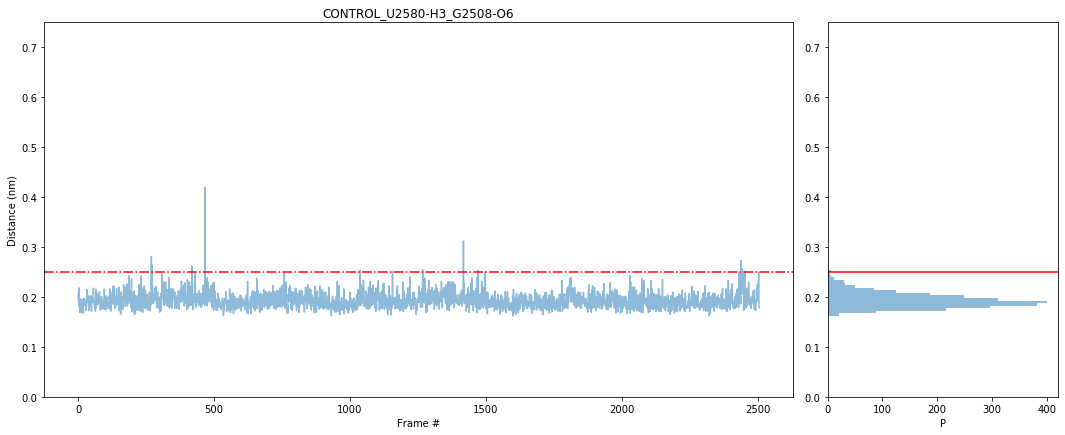

[(1701, 1679)]


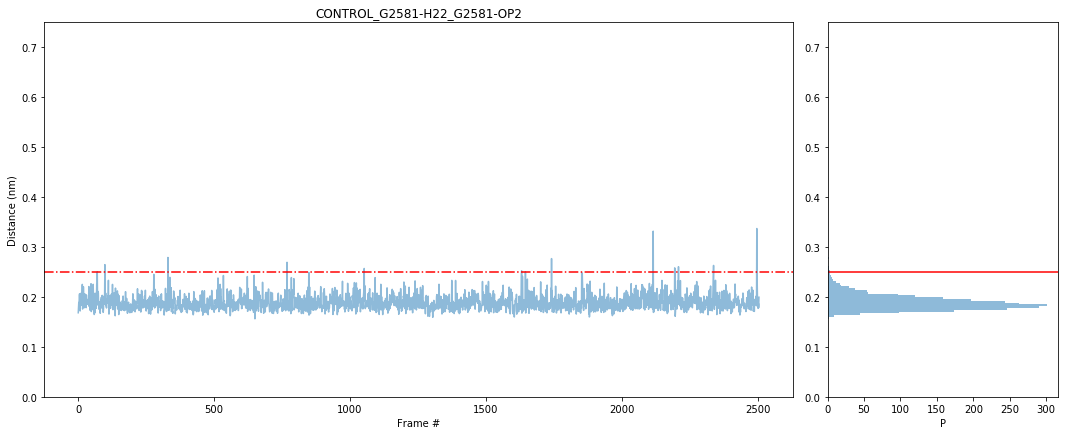

[(1731, 1342)]


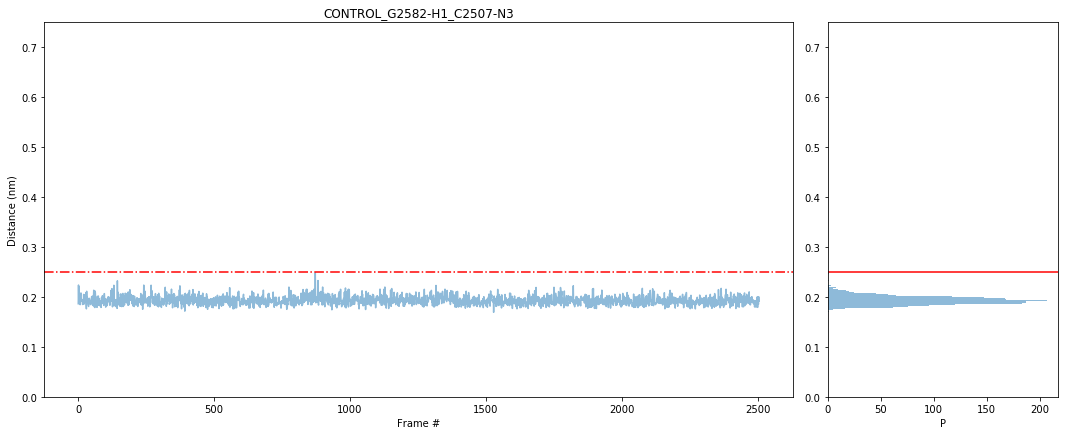

[(1734, 1344)]


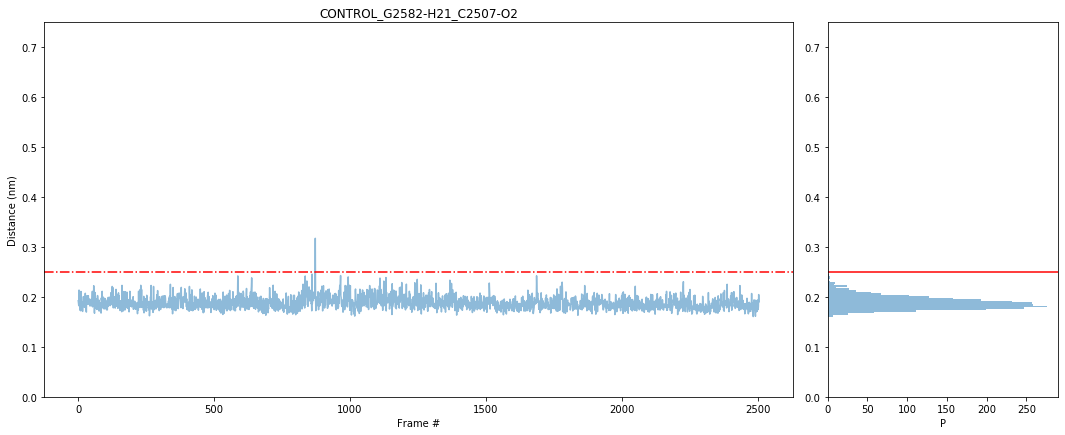

[(1735, 1445)]


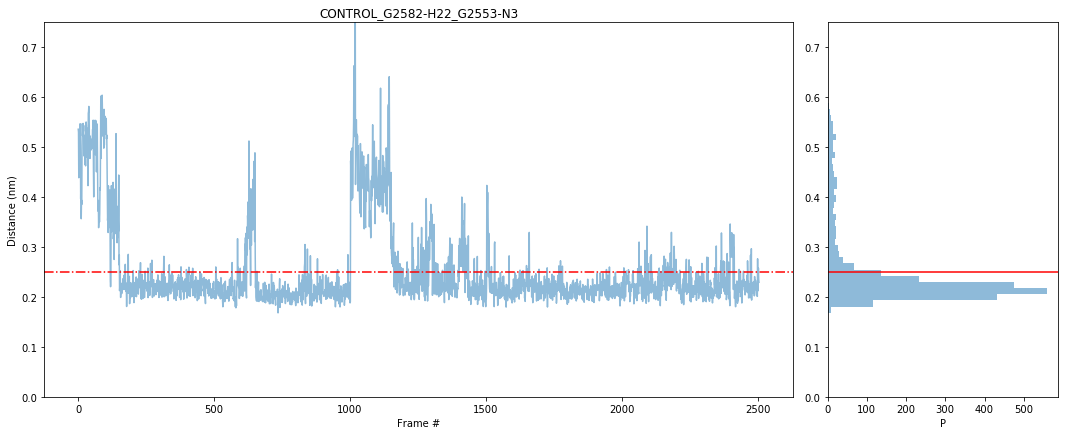

[(1765, 1313)]


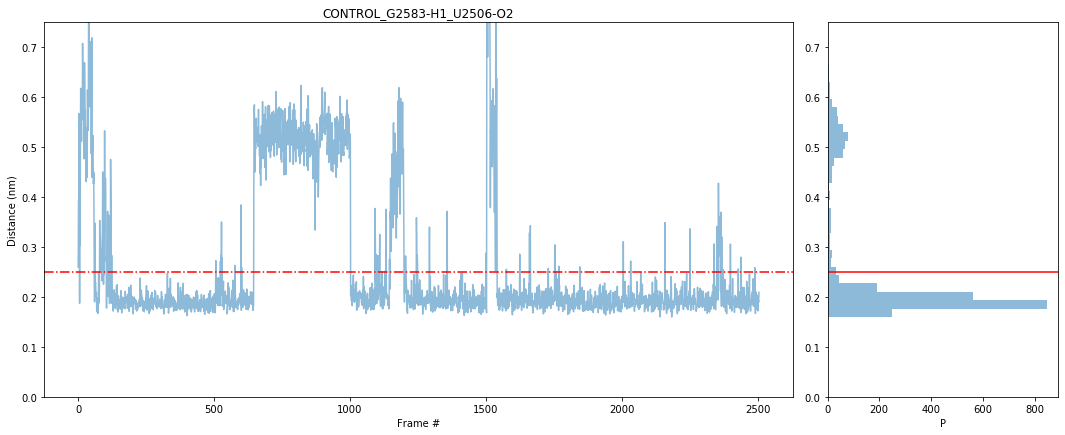

[(1888, 2283)]


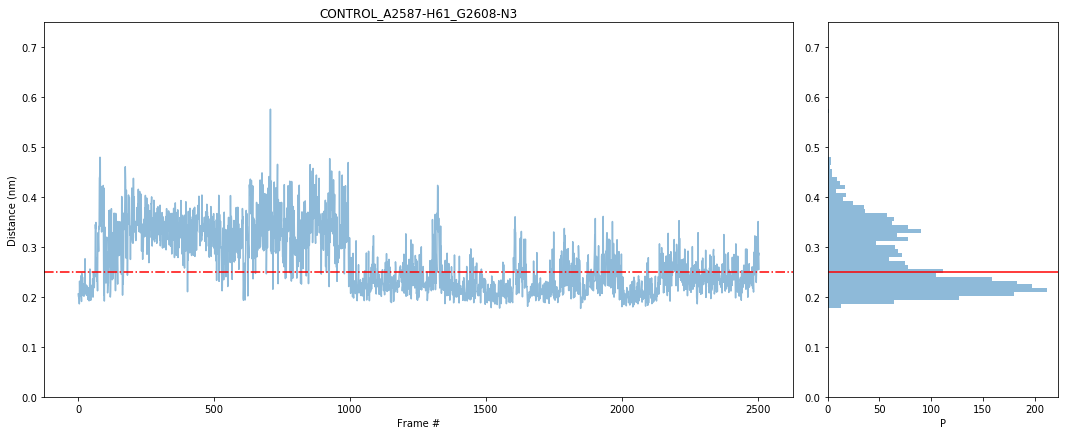

[(1922, 2214)]


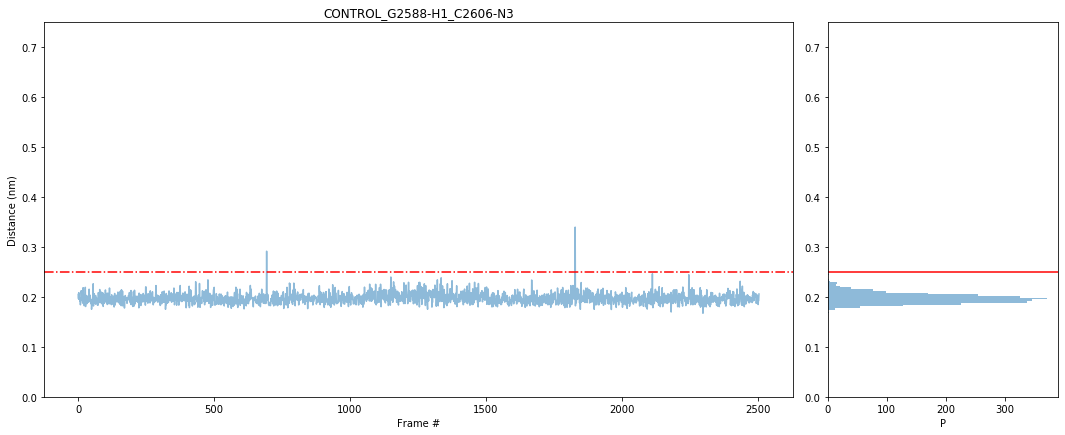

[(1925, 2216)]


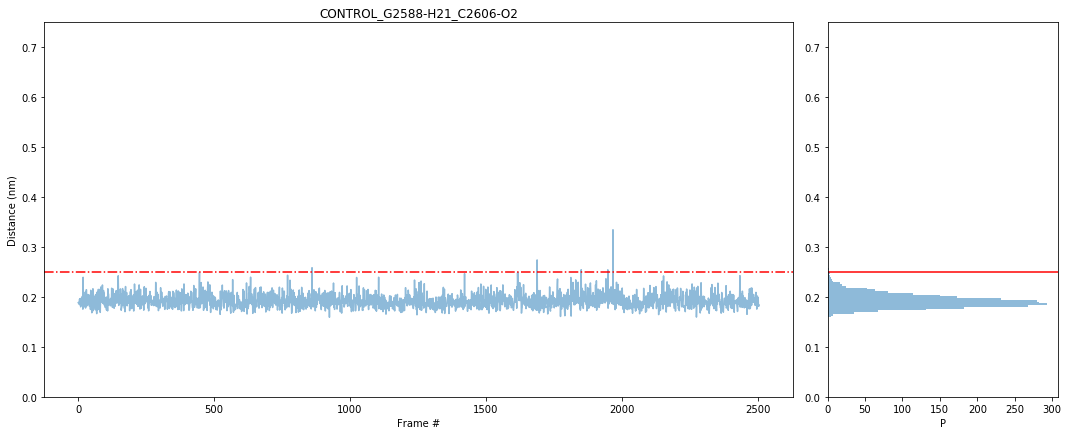

[(1956, 2181)]


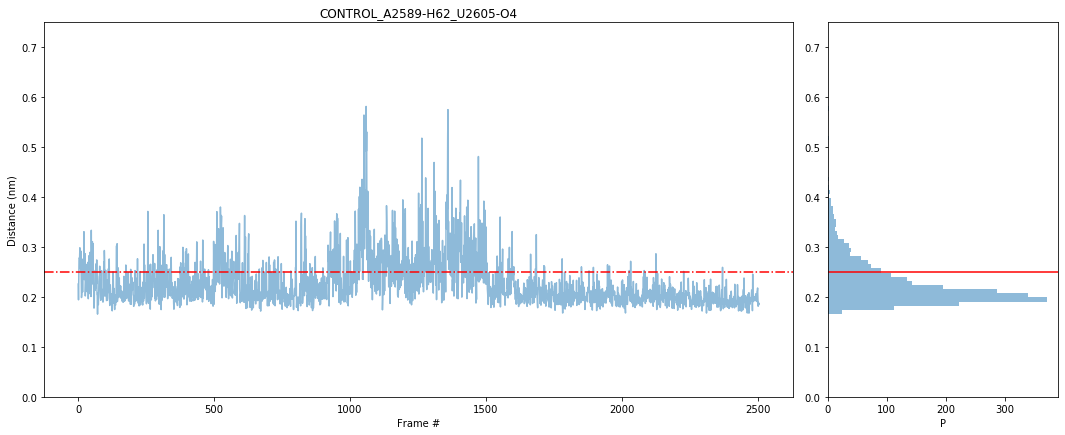

[(1989, 2151)]


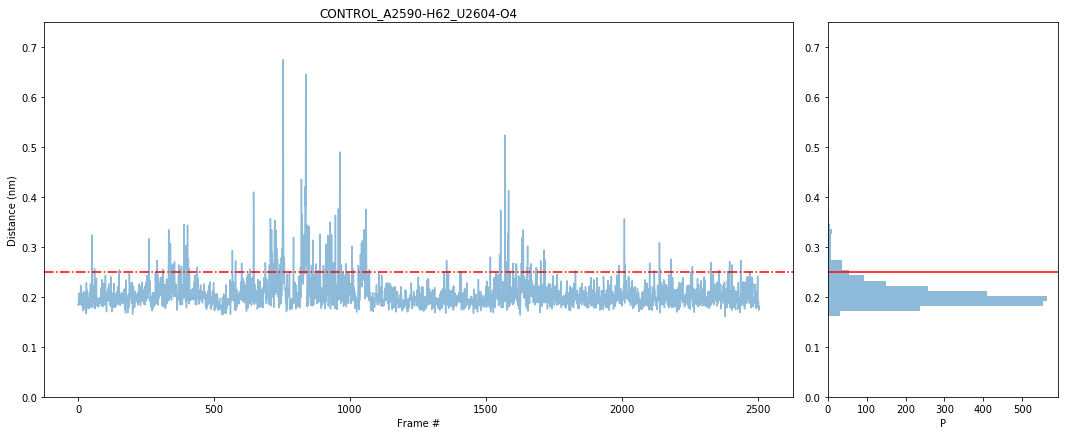

[(2153, 1990)]


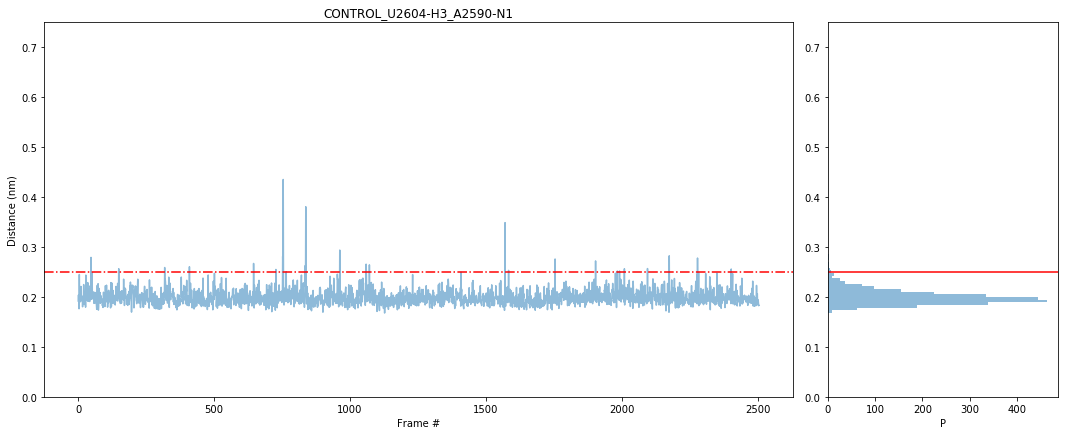

[(2183, 1957)]


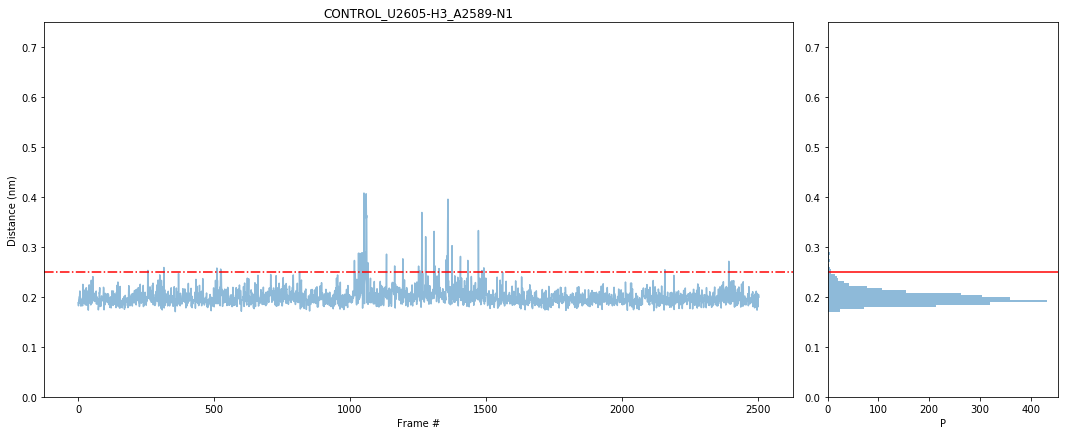

[(2213, 1920)]


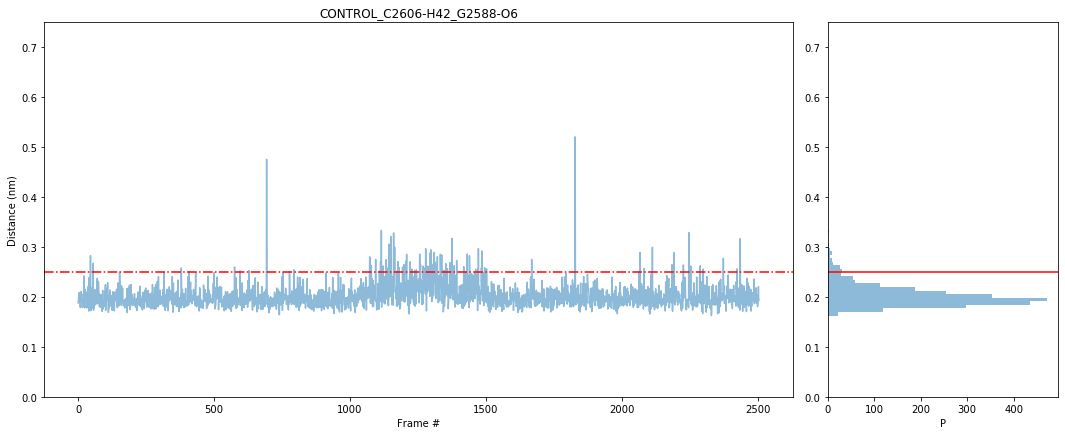

[(2281, 1871)]


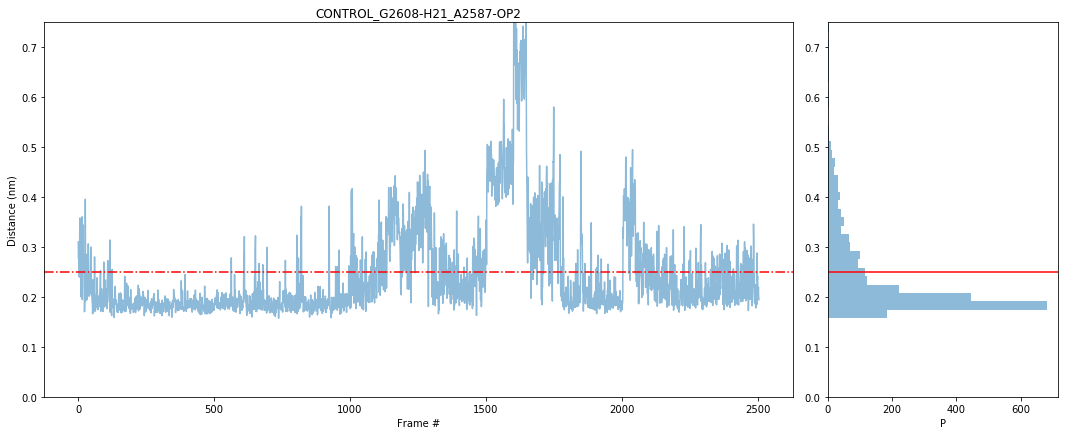

[(2282, 1884)]


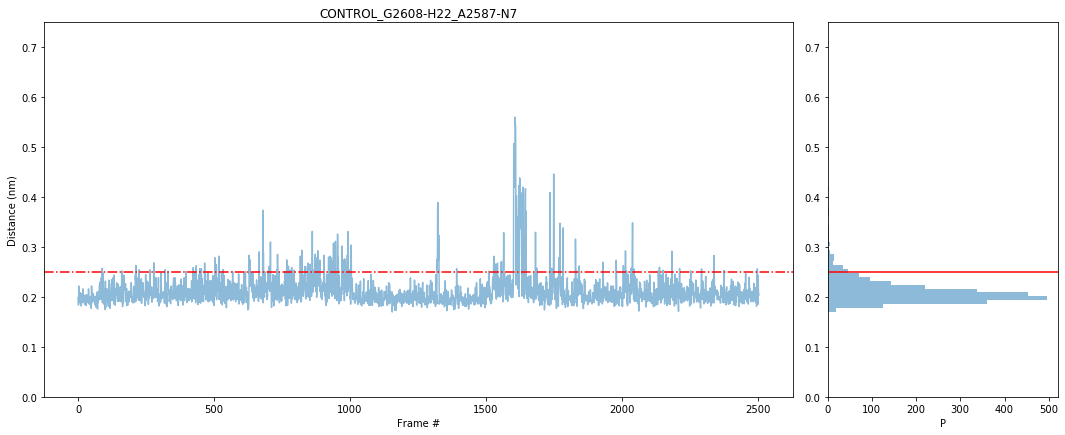

[(2365, 1519)]


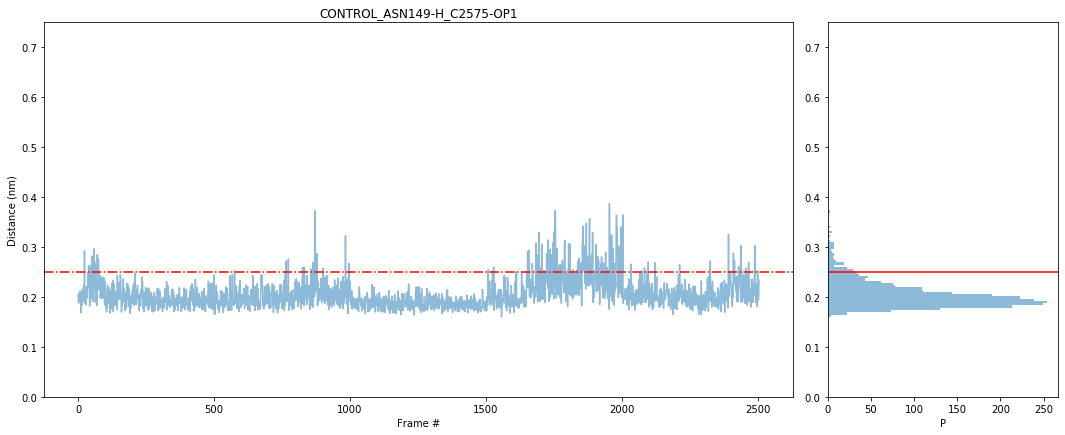

[(2398, 597)]


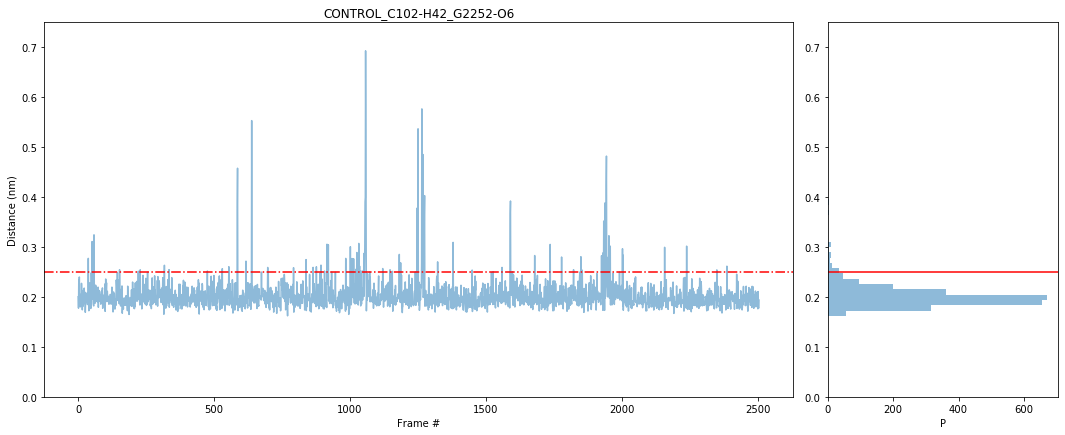

[(2429, 563)]


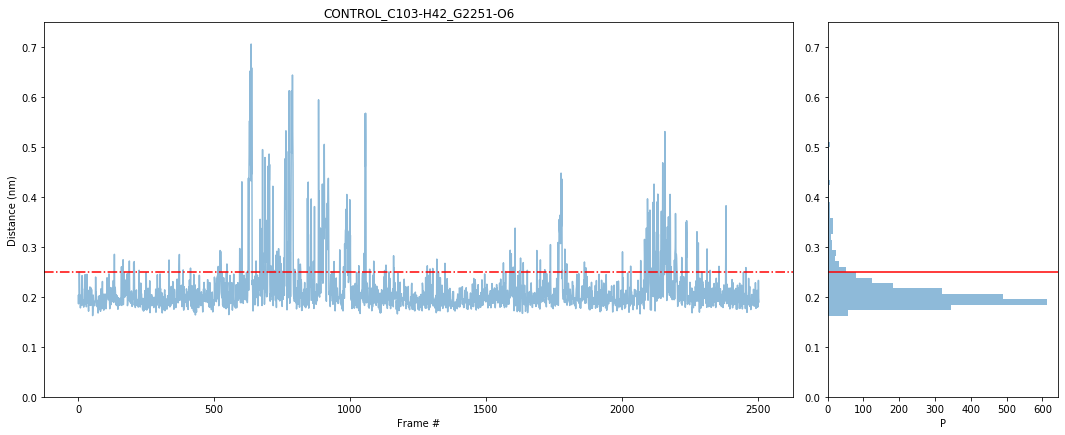

In [11]:
for hbond in hbonds2:
    atom1=hbond[1]
    atom2=hbond[2]
    pairs=[(atom1,atom2)]
    print(pairs)
    mindist=md.compute_distances(xyz, pairs)
    plot_mindist_pairs(mutsys, str(topology.atom(atom1)), str(topology.atom(atom2)))

## WT > 90%

| atom 1 | atom 2 |
|:----:|:-----:|
C2063-N4 -- C2501-O2
C2064-N4 -- G2446-O6
C2065-N4 -- G2445-O6
C2066-N4 -- G2444-O6
G2444-N1 -- C2066-N3
G2444-N2 -- C2066-O2
G2445-N1 -- C2065-N3
G2445-N2 -- C2065-O2
G2446-N1 -- C2064-N3
G2446-N2 -- C2064-O2
C2507-N4 -- G2582-O6
G2508-N1 -- U2580-O2
G2509-N1 -- C2579-N3
G2509-N2 -- C2579-O2
C2579-N4 -- G2509-O6
U2580-N3 -- G2508-O6
G2581-N2 -- G2581-OP2
G2582-N1 -- C2507-N3
G2582-N2 -- C2507-O2
G2588-N1 -- C2606-N3
G2588-N2 -- C2606-O2
A2589-N6 -- U2605-O4
A2590-N6 -- U2604-O4
U2604-N3 -- A2590-N1
U2605-N3 -- A2589-N1
C2606-N4 -- G2588-O6
G2608-N2 -- A2587-N7

## K13 > 90%

| atom 1 | atom 2 |
|:----:|:-----:|
C2064-N4 -- G2446-O6
C2065-N4 -- G2445-O6
C2066-N4 -- G2444-O6
G2251-N1 -- C103-N3
G2251-N2 -- C103-O2
G2444-N1 -- C2066-N3
G2444-N2 -- C2066-O2
G2445-N1 -- C2065-N3
G2445-N2 -- C2065-O2
G2446-N1 -- C2064-N3
G2446-N2 -- C2064-O2
C2507-N4 -- G2582-O6
G2509-N1 -- C2579-N3
G2509-N2 -- C2579-O2
C2579-N4 -- G2509-O6
U2580-N3 -- G2508-O6
G2581-N2 -- G2581-OP2
G2582-N1 -- C2507-N3
G2582-N2 -- C2507-O2
A2587-N6 -- G2608-N3
G2588-N1 -- C2606-N3
G2588-N2 -- C2606-O2
A2589-N6 -- U2605-O4
U2604-N3 -- A2590-N1
U2605-N3 -- A2589-N1
C2606-N4 -- G2588-O6
C103-N4 -- G2251-O6

## N13 > 90%

| atom 1 | atom 2 |
|:----:|:-----:|
C2065-N4 -- G2445-O6
C2066-N4 -- G2444-O6
G2251-N2 -- C103-O2
G2444-N1 -- C2066-N3
G2444-N2 -- C2066-O2
G2445-N1 -- C2065-N3
G2445-N2 -- C2065-O2
G2446-N1 -- C2064-N3
G2446-N2 -- C2064-O2
C2507-N4 -- G2582-O6
G2508-N1 -- U2580-O2
G2509-N1 -- C2579-N3
G2509-N2 -- C2579-O2
C2579-N4 -- G2509-O6
U2580-N3 -- G2508-O6
G2581-N2 -- G2581-OP2
G2582-N1 -- C2507-N3
G2582-N2 -- C2507-O2
A2587-N6 -- G2608-N3
G2588-N1 -- C2606-N3
G2588-N2 -- C2606-O2
U2605-N3 -- A2589-N1
C2606-N4 -- G2588-O6
G2608-N2 -- A2587-N7


## CONTROL >90%

| atom 1 | atom 2 |
|:----:|:-----:|
C2065-N4 -- G2445-O6
C2066-N4 -- G2444-O6
G2252-N1 -- C102-N3
G2252-N2 -- C102-O2
G2444-N1 -- C2066-N3
G2444-N2 -- C2066-O2
G2445-N1 -- C2065-N3
G2445-N2 -- C2065-O2
G2446-N1 -- C2064-N3
G2446-N2 -- C2064-O2
C2507-N4 -- G2582-O6
G2508-N1 -- U2580-O2
G2509-N1 -- C2579-N3
G2509-N2 -- C2579-O2
G2576-N1 -- U2506-OP2
C2579-N4 -- G2509-O6
U2580-N3 -- G2508-O6
G2581-N2 -- G2581-OP2
G2582-N1 -- C2507-N3
G2582-N2 -- C2507-O2
G2588-N1 -- C2606-N3
G2588-N2 -- C2606-O2
A2590-N6 -- U2604-O4
U2604-N3 -- A2590-N1
U2605-N3 -- A2589-N1
C2606-N4 -- G2588-O6
G2608-N2 -- A2587-N7
ASN149-N -- C2575-OP1
C102-N4 -- G2252-O6

## WT > 75%

| atom 1 | atom 2 |
|:----:|:-----:|
G2061-N2 -- A2062-O2'
C2063-N4 -- C2501-O2
C2064-N4 -- G2446-O6
C2065-N4 -- G2445-O6
C2066-N4 -- G2444-O6
G2444-N1 -- C2066-N3
G2444-N2 -- C2066-O2
G2445-N1 -- C2065-N3
G2445-N2 -- C2065-O2
G2446-N1 -- C2064-N3
G2446-N2 -- C2064-O2
C2507-N4 -- G2582-O6
G2508-N1 -- U2580-O2
G2509-N1 -- C2579-N3
G2509-N2 -- C2579-O2
C2579-N4 -- G2509-O6
U2580-N3 -- G2508-O6
G2581-N2 -- G2581-OP2
G2582-N1 -- C2507-N3
G2582-N2 -- C2507-O2
A2587-N6 -- G2608-N3
A2587-N6 -- G2608-O2'
G2588-N1 -- C2606-N3
G2588-N2 -- C2606-O2
A2589-N6 -- U2605-O4
A2590-N6 -- U2604-O4
U2604-N3 -- A2590-N1
U2605-N3 -- A2589-N1
C2606-N4 -- G2588-O6
G2607-N2 -- A1783-N1
G2608-N2 -- A2587-N7
SER137-OG -- U2580-OP1


## K > 75%

| atom 1 | atom 2 |
|:----:|:-----:|
C2064-N4 -- G2446-O6
C2065-N4 -- G2445-O6
C2066-N4 -- G2444-O6
G2251-N1 -- C103-N3
G2251-N2 -- C103-O2
G2252-N1 -- C102-N3
G2252-N2 -- C102-O2
G2444-N1 -- C2066-N3
G2444-N2 -- C2066-O2
G2445-N1 -- C2065-N3
G2445-N2 -- C2065-O2
G2446-N1 -- C2064-N3
G2446-N2 -- C2064-O2
C2507-N4 -- G2582-O6
G2508-N1 -- U2580-O2
G2509-N1 -- C2579-N3
G2509-N2 -- C2579-O2
C2579-N4 -- G2509-O6
U2580-N3 -- G2508-O6
G2581-N2 -- G2581-OP2
G2582-N1 -- C2507-N3
G2582-N2 -- C2507-O2
A2587-N6 -- G2608-N3
A2587-N6 -- G2608-O2'
G2588-N1 -- C2606-N3
G2588-N2 -- C2606-O2
A2589-N6 -- U2605-O4
A2590-N6 -- U2604-O4
U2604-N3 -- A2590-N1
U2605-N3 -- A2589-N1
C2606-N4 -- G2588-O6
G2608-N2 -- A2587-N7
C103-N4 -- G2251-O6

## N > 75%

| atom 1 | atom 2 |
|:----:|:-----:|
C2064-N4 -- G2446-O6
C2065-N4 -- G2445-O6
C2066-N4 -- G2444-O6
G2251-N1 -- C103-N3
G2251-N2 -- C103-O2
G2444-N1 -- C2066-N3
G2444-N2 -- C2066-O2
G2445-N1 -- C2065-N3
G2445-N2 -- C2065-O2
G2446-N1 -- C2064-N3
G2446-N2 -- C2064-O2
C2507-N4 -- G2582-O6
G2508-N1 -- U2580-O2
G2509-N1 -- C2579-N3
G2509-N2 -- C2579-O2
C2579-N4 -- G2509-O6
U2580-N3 -- G2508-O6
G2581-N2 -- G2581-OP2
G2582-N1 -- C2507-N3
G2582-N2 -- C2507-O2
G2583-N1 -- U2506-O2
A2587-N6 -- G2608-N3
A2587-N6 -- G2608-O2'
G2588-N1 -- C2606-N3
G2588-N2 -- C2606-O2
A2589-N6 -- U2605-O4
A2590-N6 -- U2604-O4
U2604-N3 -- A2590-N1
U2605-N3 -- A2589-N1
C2606-N4 -- G2588-O6
G2608-N2 -- A2587-N7

## CONTROL > 75%

| atom 1 | atom 2 |
|:----:|:-----:|
G2061-N2 -- A2062-O2'
C2064-N4 -- G2446-O6
C2065-N4 -- G2445-O6
C2066-N4 -- G2444-O6
G2252-N1 -- C102-N3
G2252-N2 -- C102-O2
G2444-N1 -- C2066-N3
G2444-N2 -- C2066-O2
G2445-N1 -- C2065-N3
G2445-N2 -- C2065-O2
G2446-N1 -- C2064-N3
G2446-N2 -- C2064-O2
G2447-N2 -- A2450-OP2
C2507-N4 -- G2582-O6
G2508-N1 -- U2580-O2
G2509-N1 -- C2579-N3
G2509-N2 -- C2579-O2
G2576-N1 -- U2506-OP2
C2579-N4 -- G2509-O6
U2580-N3 -- G2508-O6
G2581-N2 -- G2581-OP2
G2582-N1 -- C2507-N3
G2582-N2 -- C2507-O2
G2582-N2 -- G2553-N3
G2583-N1 -- U2506-O2
G2588-N1 -- C2606-N3
G2588-N2 -- C2606-O2
A2589-N6 -- U2605-O4
A2590-N6 -- U2604-O4
U2604-N3 -- A2590-N1
U2605-N3 -- A2589-N1
C2606-N4 -- G2588-O6
G2608-N2 -- A2587-N7
ASN149-N -- C2575-OP1
C102-N4 -- G2252-O6
C103-N4 -- G2251-O6

## WT > 50%

| atom 1 | atom 2 |
|:----:|:-----:|
U1782-N3 -- U2586-O4
A1784-N6 -- U1779-OP2
G2061-N2 -- A2062-O2'
C2063-N4 -- G2061-O2'
C2063-N4 -- C2501-O2
C2064-N4 -- G2446-O6
C2065-N4 -- G2445-O6
C2066-N4 -- G2444-O6
G2251-N1 -- C103-N3
G2251-N2 -- C103-O2
G2252-N1 -- C102-N3
G2252-N2 -- C102-O2
G2444-N1 -- C2066-N3
G2444-N2 -- C2066-O2
G2445-N1 -- C2065-N3
G2445-N2 -- C2065-O2
G2446-N1 -- C2064-N3
G2446-N2 -- C2064-O2
A2450-N6 -- C2063-O2
C2452-N4 -- U2504-O4
A2453-N6 -- U2500-O4
U2500-N3 -- A2453-N1
U2504-N3 -- C2452-N3
C2507-N4 -- G2582-O6
G2508-N1 -- U2580-O2
G2509-N1 -- C2579-N3
G2509-N2 -- C2579-O2
G2553-N2 -- C2507-O2'
G2553-N2 -- G2508-O4'
C2579-N4 -- G2509-O6
U2580-N3 -- G2508-O6
G2581-N2 -- G2581-OP2
G2582-N1 -- C2507-N3
G2582-N2 -- C2507-O2
G2582-N2 -- G2553-N3
U2586-N3 -- U1782-O4
A2587-N6 -- G2608-N3
A2587-N6 -- G2608-O2'
G2588-N1 -- C2606-N3
G2588-N2 -- C2606-O2
A2589-N6 -- U2605-O4
A2590-N6 -- U2604-O4
U2604-N3 -- A2590-N1
U2605-N3 -- A2589-N1
C2606-N4 -- G2588-O6
G2607-N2 -- A1783-N1
G2608-N1 -- U2586-OP2
G2608-N2 -- A2587-N7
U2609-N3 -- U1782-OP2
C102-N4 -- G2252-O6
C103-N4 -- G2251-O6
SER137-OG -- U2580-OP1


## K > 50% 

| atom 1 | atom 2 |
|:----:|:-----:|
U1782-N3 -- U2586-O4
A1784-N6 -- U1779-OP2
G2061-N2 -- A2062-O2'
C2063-N4 -- G2061-O2'
C2063-N4 -- C2501-O2
C2064-N4 -- G2446-O6
C2065-N4 -- G2445-O6
C2066-N4 -- G2444-O6
G2251-N1 -- C103-N3
G2251-N2 -- C103-O2
G2252-N1 -- C102-N3
G2252-N2 -- C102-O2
G2444-N1 -- C2066-N3
G2444-N2 -- C2066-O2
G2445-N1 -- C2065-N3
G2445-N2 -- C2065-O2
G2446-N1 -- C2064-N3
G2446-N2 -- C2064-O2
C2507-N4 -- G2582-O6
G2508-N1 -- U2580-O2
G2509-N1 -- C2579-N3
G2509-N2 -- C2579-O2
G2576-N1 -- U2506-OP2
C2579-N4 -- G2509-O6
U2580-N3 -- G2508-O6
G2581-N2 -- G2581-OP2
G2582-N1 -- C2507-N3
G2582-N2 -- C2507-O2
G2582-N2 -- G2553-N3
U2586-N3 -- U1782-O4
A2587-N6 -- G2608-N3
A2587-N6 -- G2608-O2'
G2588-N1 -- C2606-N3
G2588-N2 -- C2606-O2
A2589-N6 -- U2605-O4
A2590-N6 -- U2604-O4
U2604-N3 -- A2590-N1
U2605-N3 -- A2589-N1
C2606-N4 -- G2588-O6
G2607-N2 -- A1783-N1
G2608-N1 -- U2586-OP2
G2608-N2 -- A2587-N7
C102-N4 -- G2252-O6
C103-N4 -- G2251-O6


## N > 50% 

| atom 1 | atom 2 |
|:----:|:-----:|
U1782-N3 -- U2586-O4
A1784-N6 -- U1779-OP2
G2061-N2 -- A2062-O2'
C2064-N4 -- G2446-O6
C2065-N4 -- G2445-O6
C2066-N4 -- G2444-O6
G2251-N1 -- C103-N3
G2251-N2 -- C103-O2
C2440-N4 -- U2438-O2
G2444-N1 -- C2066-N3
G2444-N2 -- C2066-O2
G2445-N1 -- C2065-N3
G2445-N2 -- C2065-O2
G2446-N1 -- C2064-N3
G2446-N2 -- C2064-O2
G2447-N2 -- A2450-OP2
U2506-N3 -- G2583-O6
C2507-N4 -- G2582-O6
G2508-N1 -- U2580-O2
G2509-N1 -- C2579-N3
G2509-N2 -- C2579-O2
G2553-N2 -- C2507-O2
G2576-N1 -- U2506-OP2
C2579-N4 -- G2509-O6
U2580-N3 -- G2508-O6
G2581-N2 -- G2581-OP2
G2582-N1 -- C2507-N3
G2582-N2 -- C2507-O2
G2582-N2 -- G2553-N3
G2583-N1 -- U2506-O2
A2587-N6 -- G2608-N3
A2587-N6 -- G2608-O2'
G2588-N1 -- C2606-N3
G2588-N2 -- C2606-O2
A2589-N6 -- U2605-O4
A2590-N6 -- U2604-O4
U2604-N3 -- A2590-N1
U2605-N3 -- A2589-N1
C2606-N4 -- G2588-O6
G2608-N2 -- A2587-N7
ASN149-ND2 -- C2575-OP1
C103-N4 -- G2251-O6


## CONTROL > 50% 

| atom 1 | atom 2 |
|:----:|:-----:|
G2061-N2 -- A2062-O2'
C2064-N4 -- G2446-O6
C2065-N4 -- G2445-O6
C2066-N4 -- G2444-O6
G2251-N1 -- C103-N3
G2251-N2 -- C103-O2
G2252-N1 -- C102-N3
G2252-N2 -- C102-O2
G2444-N1 -- C2066-N3
G2444-N2 -- C2066-O2
G2445-N1 -- C2065-N3
G2445-N2 -- C2065-O2
G2446-N1 -- C2064-N3
G2446-N2 -- C2064-O2
G2447-N2 -- A2450-OP2
G2505-N1 -- G2581-O6
G2505-N2 -- U2506-O4
U2506-N3 -- G2583-O6
C2507-N4 -- G2582-O6
G2508-N1 -- U2580-O2
G2509-N1 -- C2579-N3
G2509-N2 -- C2579-O2
G2553-N2 -- G2508-O4'
G2576-N1 -- U2506-OP2
C2579-N4 -- G2576-O4'
C2579-N4 -- G2509-O6
U2580-N3 -- G2508-O6
G2581-N2 -- G2581-OP2
G2582-N1 -- C2507-N3
G2582-N2 -- C2507-O2
G2582-N2 -- G2553-N3
G2583-N1 -- U2506-O2
A2587-N6 -- G2608-N3
G2588-N1 -- C2606-N3
G2588-N2 -- C2606-O2
A2589-N6 -- U2605-O4
A2590-N6 -- U2604-O4
U2604-N3 -- A2590-N1
U2605-N3 -- A2589-N1
C2606-N4 -- G2588-O6
G2608-N2 -- A2587-OP2
G2608-N2 -- A2587-N7
ASN149-N -- C2575-OP1
C102-N4 -- G2252-O6
C103-N4 -- G2251-O6
